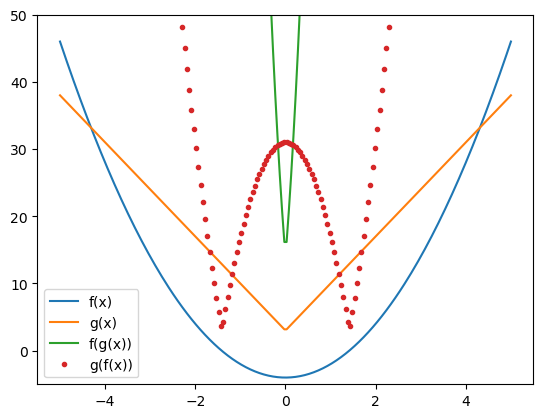

In [ ]:
################ COMPOSITE/INVERSE FUNCTIONS ####################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 

##### COMPOSITE FUNCTIONS ######

# define functions to compose

def fx(x):
    return 2*x**2 - 4

def gx(x):
    return 7*np.abs(x) + 3

xx = np.linspace(-5,5,200) # Range of input

# composite function
fgx = fx(gx(xx))
gfx = gx(fx(xx))

plt.plot(xx, fx(xx), label='f(x)')
plt.plot(xx, gx(xx), label='g(x)')

plt.plot(xx, fgx, label='f(g(x))')
plt.plot(xx, gfx, '.', label='g(f(x))')

plt.ylim([-5,50]) # adjust y axis range for better showing of the plots against each other

plt.legend()
plt.show()

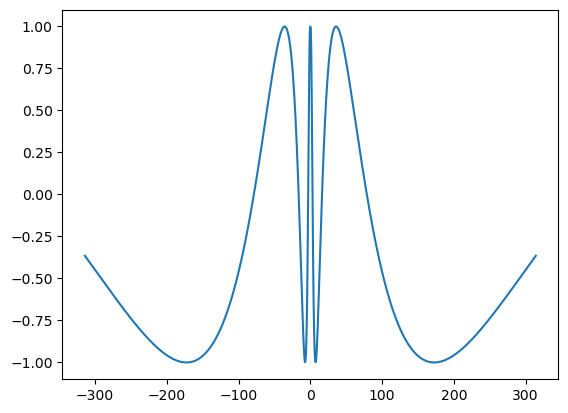

C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_10408\1492893851.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x)


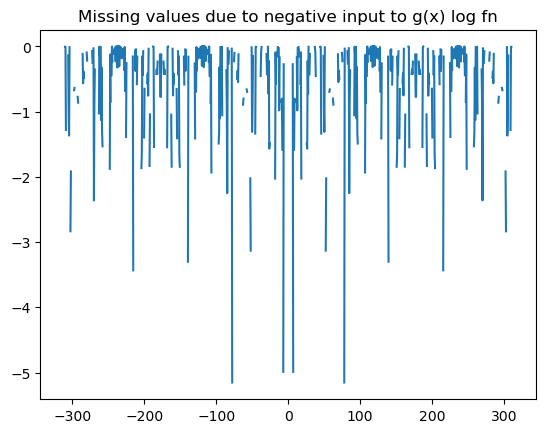

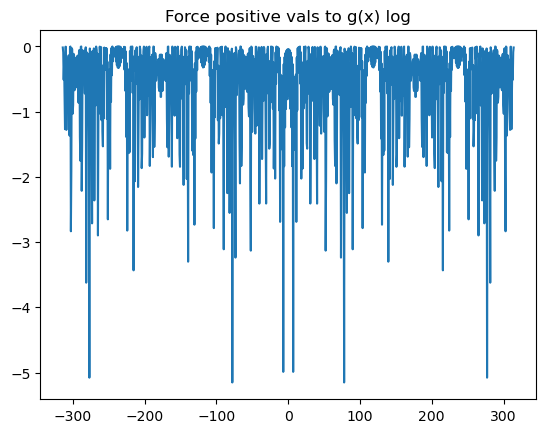

In [ ]:
#### More Composite function examples

def fx(x):
    return np.sin(x)
def gx(x):
    return np.log(x)
def hx(x):
    return 2*x**2 + 5

# generate a larger range of input (makes x axis much larger)
xx = np.linspace(-100*np.pi, 100*np.pi, 1001) # arbitrary large range, the pi multiple means nothing

f3 = fx(gx(hx(xx)))

plt.plot(xx, f3)

plt.show()


# play with the order of composition to see the effects

# Looks like rain... (will have warnings about negative values for the log function gx)
f3 = gx(fx(hx(xx)))

plt.title('Missing values due to negative input to g(x) log fn')
plt.plot(xx, f3)
plt.show()

# redefine gx to eliminate negative input, which fills in the gaps of the "rain" plot above:
def gx(x):
    return np.log(np.abs(x))

f3 = gx(fx(hx(xx)))

plt.title('Force positive vals to g(x) log')
plt.plot(xx, f3)
plt.show()


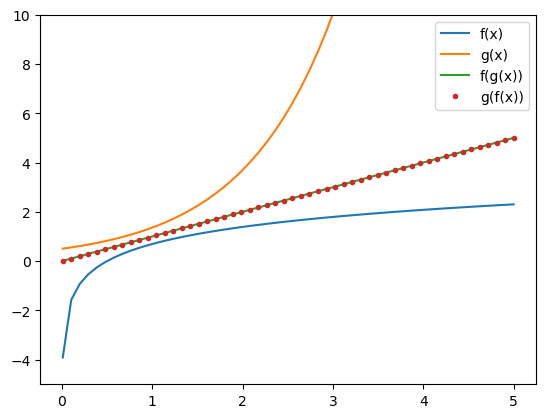

In [ ]:
############# INVERSE FUNCTIONS ####################


#### Natural Log/Natural Exponent Inversion #####

# The natural log and natural exponential are inverse functions of each other
# We will demonstrate this by composing these functions

# note: the domain cannot include x=0 in the domain since ln(2x) will give us minus infinity, has to be above 0

def fx(x): return np.log(2*x)
def gx(x): return np.exp(x)/2 # this is the inverse manually calculated from the above using exp to cancel log and solve for x. epx(y) = exp(log(2x)), exp(y) = 2x, x = exp(y)/2 (then swap y for x)


# define the range
xx = np.linspace(.01,5,54)

fgx = fx(gx(xx)) # composite
gfx = gx(fx(xx)) # opposite of above

# Plot: we see a Unity Line (with a slope of 1, red/green) with either combination of composition since the functions invert each other

plt.plot(xx, fx(xx), label='f(x)')
plt.plot(xx, gx(xx), label='g(x)')
plt.plot(xx, fgx, label='f(g(x))')
plt.plot(xx, gfx, '.', label='g(f(x))') # note: pixelation artifacts might not show overlap with green line perfectly, but they are a unity line (same since they cancel each other)
plt.legend()
# Adjust the y-axis so the g(x) doesn't dominate the graph
plt.ylim([-5,10])

plt.show()


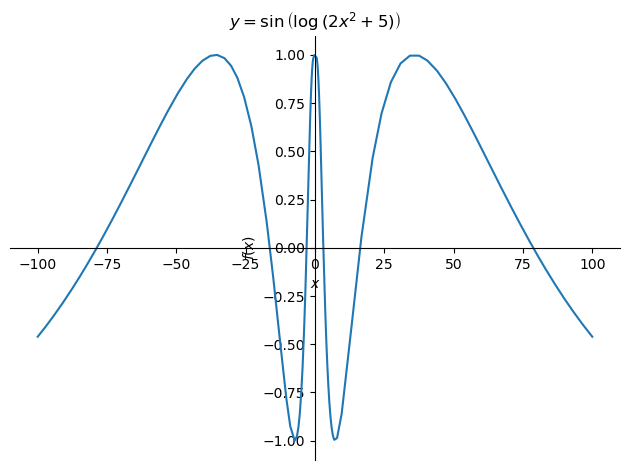

In [31]:
################## USING SYMPY ##########################


# Exercise with a triple composite function using Sympy instead of Numpy

# create a symbolic variable from sympy
sx = sym.symbols('x')

fx = sym.sin(sx)
gx = sym.log(sx)
hx = 2*sx**2 + 5

# compose the functions using .subs from sympy

#  pass in a function expression instead of a number (substitute input x for function fx with a function)
fx.subs(sx, gx.subs(sx, hx)) # embeds g(x) inside f(x) and h(x) inside g(x)

# alternative using a dictionary - useful if substituting multiple variables
f3 = fx.subs(sx, gx.subs({'x': hx}))

# plot with latek printing in the title:
p = sym.plot(f3, (sx, -100, 100), title=f'$y = {sym.latex(f3)}$', show=False)

p.show()

In [ ]:
# Compute the inverse functions with Sympy of `f(x) = 2x + 3` and `g(x) = 2x + sin(x)`

# create new symbolic variable y
y = sym.symbols('y')

# reuse the already defined symbolic x
f = 2*sx + 3

# compute the inverse function: solve for y = f, where y - (f = 0)
# set the equation f to 0 to solve this, subtract f(x) from both sides of the equation
invf = sym.solve(y - f, sx)[0] # pass in sx to say we're solving for x. drop the `= 0` drop 0 because sympy implicitly assumes we are setting it to 0
# .solve() returns a list of solutions, we just want the one in it. This is solved for x as a function of y

# set x = 4 in the function (just for example)
f.subs(sx, 4) # 11

# compose the functions
invf.subs(y, f.subs(sx, 4)) # remember that invf now does not have sx (x) in it, but has y
# should return 4 (input x transformation undone)

# the opposite to prove the inversion computation worked
f.subs(sx, invf.subs(y, 4)) # 4


4

In [ ]:
#### Function that does not have an inverse:
y = sym.symbols('y')

f = 2*sx + sym.sin(sx) # not invertible

invf = sym.solve(y - f, sx)[0]
invf # raises error - unable to compute an inverse

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -2*x + y - sin(x)